## Profit share of Net Domestic Product vs Investment Share of Net Domestic Product

In [1]:
# Preliminaries
%matplotlib inline

import sys
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime

print 'Python version: ' + '.'.join(map(str, sys.version_info[:3]))
print 'Pandas version: ' + pd.__version__

Python version: 2.7.13
Pandas version: 0.19.2


In [2]:
# Series list
series = ['CP', 'CPATAX', 'CPROFIT', 'PNFI', 'A362RC1Q027SBEA']

# Select start date:
start_date = datetime.datetime(1964,1,1)

##### Notes on series:
CP is Corporate Profits After Tax (w/o IVA and CCAdj) - Not used

CPATAX is CP w/ IVA and CCAdj (NIPA table 1.12) 

CPROFIT is CP before tax (NIPA table 1.12)
https://www.bea.gov/national/pdf/ch13%20profits%20for%20posting.pdf

PNFI is Non-residential private fixed investment (NIPA table 5.3.5)
https://www.bea.gov/national/pdf/NIPAhandbookch6.pdf

A362RC1Q027SBEA is Net Domestic Product (NDP), equal to gross domestic product (GDP) less consumption of fixed capital (CFC). Found as addenda item in GDP News Release Table 3.

All series are nominal figures and seasonally adjusted at an annual rate.

###### Notes re: adjustments to CP:
Inventory Valuation Adjustment (IVA) adjusts for changes to prices of inventory.

Capital Consumption Adjustment (CCAdj) 1) standardizes depreciation patterns and 2) Adjusts for profit/loss from change in valuation of depreciation items.

##### Why 'National' rather than 'Domestic' Profits:

From the BEA: The profits component of domestic income excludes the income earned abroad by U.S. corporations and includes the income earned in the United States by foreign residents. 

In [11]:
# Retrieve series from Fred as pandas dataframe named df
df = web.DataReader(series, 'fred', start_date)

In [12]:
# Calculate share of NDP for CPATAX, CPROFIT, and PNFI
for s in series[1:-1]:
    df[s+'_NDP'] = (df[s] / df[series[-1]] * 100).round(2)
print 'Data, values in billions of dollars, columns ending in _NDP are percent:'
df

Data, values in billions of dollars, columns ending in _NDP are percent:


,CP,CPATAX,CPROFIT,PNFI,A362RC1Q027SBEA,CPATAX_NDP,CPROFIT_NDP,PNFI_NDP
DATE,,,,,,,,
1964-01-01,42.9,49.1,77.1,69.1,590.5,8.31,13.06,11.70
1964-04-01,42.8,49.4,77.3,71.1,599.0,8.25,12.90,11.87
1964-07-01,43.9,49.9,78.4,73.4,609.9,8.18,12.85,12.03
1964-10-01,43.5,49.9,78.0,75.3,614.2,8.12,12.70,12.26
1965-01-01,49.5,56.3,85.8,80.2,633.7,8.88,13.54,12.66
1965-04-01,51.3,57.5,88.0,83.4,645.3,8.91,13.64,12.92
1965-07-01,52.2,58.2,89.3,86.7,661.4,8.80,13.50,13.11
1965-10-01,55.2,60.9,94.0,90.6,682.6,8.92,13.77,13.27
1966-01-01,56.7,63.2,97.4,94.4,705.0,8.96,13.82,13.39


### Correlation between investment and corporate profit

Increases in corporate profits, either before or after tax, are not coincident with increases in private non-residential fixed investment, and are shown to be weakly negatively correlated.

In [18]:
# Simple correlations
print 'Correlation: corporate profit (after tax) share of NDP and investment share of NDP: {}'.format(
    round(df['CPATAX_NDP'].corr(df['PNFI_NDP']),2))

print 'Correlation: corporate profit (before tax) share of NDP and investment share of NDP: {}'.format(
    round(df['CPROFIT_NDP'].corr(df['PNFI_NDP']),2))

print 'Correlation: corporate profit (after tax) share of NDP and investment share of NDP (one-year percent change): {}'.format(
    round(df['CPATAX_NDP'].pct_change(4).corr(df['PNFI_NDP'].pct_change(4)),2))

print 'Correlation: corporate profit (before tax) share of NDP and investment share of NDP (one-year percent change): {}'.format(
    round(df['CPROFIT_NDP'].pct_change(4).corr(df['PNFI_NDP'].pct_change(4)),2))

Correlation: corporate profit (after tax) share of NDP and investment share of NDP: -0.14
Correlation: corporate profit (before tax) share of NDP and investment share of NDP: -0.26
Correlation: corporate profit (after tax) share of NDP and investment share of NDP (one-year percent change): -0.23
Correlation: corporate profit (before tax) share of NDP and investment share of NDP (one-year percent change): -0.16


### Correlation of investment with cost of capital

One factor which may be more likely to affect a firm's investment decision is their cost of capital. However, interest rates move together and the Fed lowers the cost of capital in response to weakened economic growth (which includes investment).

In [14]:
# Calculate a quarterly-average real yield for BAA corporate bonds
# Step 1: Long-term more accurate CPI rebased to 1999
#    January 1913 - December 1966: CPI-U multiplied by 100/168.3
#    January 1967 - November 1977: CPI-U-X1 multiplied by 100/168.3
#    December 1977 - November 1999: CPI-U-RS multiplied by 100/247.3
#    December 1999 - present: C-CPI-U transcribed as-is
cpi = pd.read_csv('cpi-adjusted.csv', parse_dates=True)[600:].set_index('DATE').pct_change(12).multiply(100).dropna()

# Retrieve BAA yield history (monthly) from FRED
baa = web.DataReader('BAA', 'fred', start_date)
baa = pd.concat([cpi, baa], axis=1)
# Converting the index as date
baa.index = pd.to_datetime(baa.index)
baa['real'] = baa['BAA'].subtract(baa['cpi'])
baa_q = baa['BAA'].resample('QS').mean()
baa_real_q = baa['real'].resample('QS').mean()

# Calculate correlation with investment:
print 'Correlation: yield of BAA corporate bonds and investment share of NDP: {}'.format(
    round(baa_q.corr(df['PNFI_NDP']),2))

print 'Correlation: yield of BAA corporate bonds and investment share of NDP (one-year percent change): {}'.format(
    round(baa_q.pct_change(4).dropna().corr(df['PNFI_NDP'].pct_change(4).dropna()),2))

Correlation: yield of BAA corporate bonds and investment share of NDP: 0.51
Correlation: yield of BAA corporate bonds and investment share of NDP (one-year percent change): 0.21


### What about lagged investment?

Is it possible that because of the length of investment projects, a change in corporate profits or cost of capital will eventually spur investment?

In [53]:
corr_lag_tax = round(df['PNFI_NDP'].pct_change(4).shift(-4).dropna().corr(df['CPATAX_NDP'].pct_change(4)[:-4].dropna()),2)
corr_lag_baa = round(df['PNFI_NDP'].pct_change(4).shift(-4).dropna().corr(baa_q.pct_change(4)[:-4].dropna()),2)

print 'Correlation: corporate profits (after tax) and one-year lagged investment share of NDP (one-year percent change): {}'.format(corr_lag_tax)
print 'Correlation: yield of BAA corporate bonds and one-year lagged investment share of NDP (one-year percent change): {}'.format(corr_lag_baa)

Correlation: corporate profits (after tax) and one-year lagged investment share of NDP (one-year percent change): 0.32
Correlation: yield of BAA corporate bonds and one-year lagged investment share of NDP (one-year percent change): -0.21


### Clean up series to make some simple plots

In [7]:
# Select relevant columns to plot and rename them
slist = ['CP before tax to NDP', 'CP after tax to NDP', 'Investment to NDP']

In [8]:
df.rename(columns={'CPATAX_NDP': 'CP after tax to NDP', 
                   'CPROFIT_NDP': 'CP before tax to NDP',
                   'PNFI_NDP': 'Investment to NDP'}, inplace=True)

### Plotting investment & corporate profit share of GDP

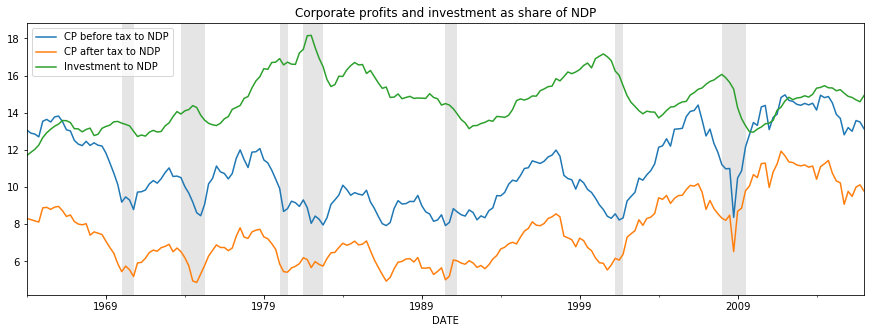

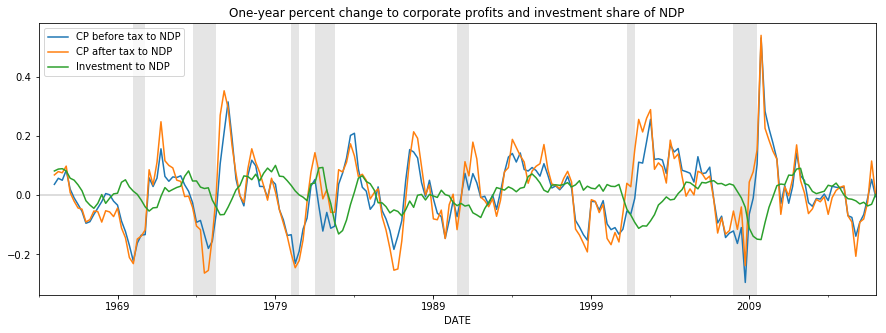

In [9]:
# Plot share of NDP first:
df[slist].plot(figsize=(15, 5), 
               title='Corporate profits and investment as share of NDP')
# Shaded bars indicating recessions
for i, v in pd.read_csv('rec_dates2.csv').dropna().iterrows():
    plt.axvspan(v['peak'], v['trough'], fill=True, linewidth=0, color='gray', alpha=0.2)

# Plot perent change in share of NDP:
df[slist].pct_change(4).plot(figsize=(15, 5), 
                             title='One-year percent change to corporate profits and investment share of NDP')
# Shaded bars indicating recessions
for i, v in pd.read_csv('rec_dates2.csv').dropna().iterrows():
    plt.axvspan(v['peak'], v['trough'], fill=True, linewidth=0, color='gray', alpha=0.2)
# Create a horizontal line at the origin
plt.axhline(y=0, color='lightgray', zorder=0)

### Background and related research:

2015 Paper on Corporate Profits and Economic Growth: http://www8.gsb.columbia.edu/faculty-research/sites/faculty-research/files/NALLAREDDY%20CP%20%282%29.pdf

2010 Romer and Romer AER paper: http://eml.berkeley.edu/~dromer/papers/RomerandRomerAERJune2010.pdf

SIFMA stats on average maturity at issuance for corporate bonds: http://www.sifma.org/research/statistics.aspx

